In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

students_df = pd.read_sql_query('select * from studentsperformance',con=engine)

## Q 1

In [2]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


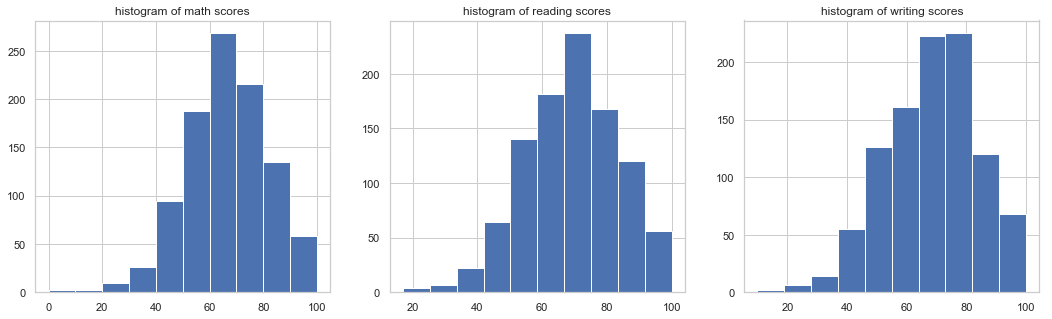

In [3]:
plt.figure(figsize=(18,5))

# histograms of the box-cox transformed data
plt.subplot(1, 3, 1)
plt.hist(students_df['math score'])
plt.title("histogram of math scores")

plt.subplot(1, 3, 2)
plt.hist(students_df['reading score'])
plt.title("histogram of reading scores")

plt.subplot(1, 3, 3)
plt.hist(students_df['writing score'])
plt.title("histogram of writing scores")

plt.show()

In [4]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

In [5]:
jarque_bera(students_df['math score'])

(15.912256686712709, 0.0003505075386818213)

In [6]:
normaltest(students_df['math score'])

NormaltestResult(statistic=15.408960513931822, pvalue=0.00045080293869937836)

In [7]:
jarque_bera(students_df['reading score'])

(11.383300575987892, 0.0033740202672214448)

In [8]:
normaltest(students_df['reading score'])

NormaltestResult(statistic=11.11741279628622, pvalue=0.003853758403576582)

In [9]:
jarque_bera(students_df['writing score'])

(13.98509448257235, 0.0009187033894586527)

In [10]:
normaltest(students_df['writing score'])

NormaltestResult(statistic=13.606450837263859, pvalue=0.0011101885439899974)

In [11]:
from scipy.stats import boxcox

In [12]:
def posfun(x):
    if x <0:
        x = -1*x
    elif x == 0:
        x = x + 1
    else:
        x = x
    return x

In [13]:
students_df['new_math'] = students_df['math score'].map(posfun)

In [14]:
students_df['new_reading'] = students_df['reading score'].map(posfun)

In [15]:
students_df['new_writing'] = students_df['writing score'].map(posfun)

In [16]:
math_boxcox = boxcox(students_df.new_math)
reading_boxcox = boxcox(students_df.new_reading)
writing_boxcox = boxcox(students_df.new_writing)

In [17]:
students_df.math_boxcox = boxcox(students_df.new_math)
students_df.reading_boxcox = boxcox(students_df.new_reading)
students_df.writing_boxcox = boxcox(students_df.new_writing)

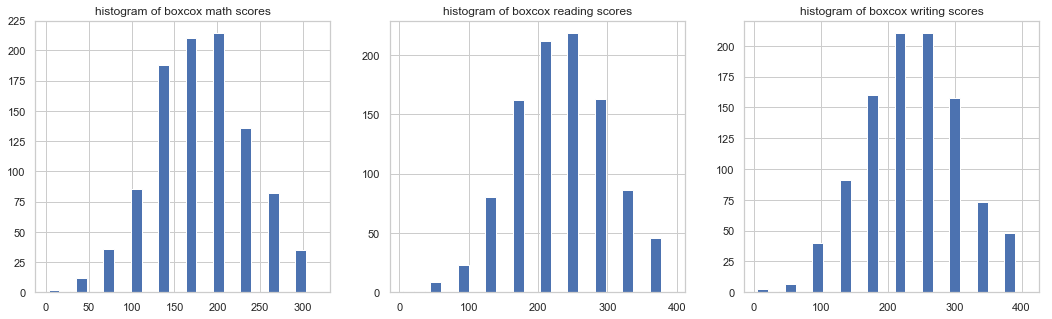

In [18]:
plt.figure(figsize=(18,5))

# histograms of the box-cox transformed data
plt.subplot(1, 3, 1)
plt.hist(math_boxcox)
plt.title("histogram of boxcox math scores")

plt.subplot(1, 3, 2)
plt.hist(reading_boxcox)
plt.title("histogram of boxcox reading scores")

plt.subplot(1, 3, 3)
plt.hist(writing_boxcox)
plt.title("histogram of boxcox writing scores")

plt.show()

In [19]:
jarque_bera(students_df.math_boxcox)

ValueError: operands could not be broadcast together with shapes (2,) (1000,) 

In [20]:
normaltest(students_df.math_boxcox)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

## Q 2

In [21]:
students_df['composite'] = (students_df['math score'] + students_df['reading score'] + students_df['writing score']) / 3

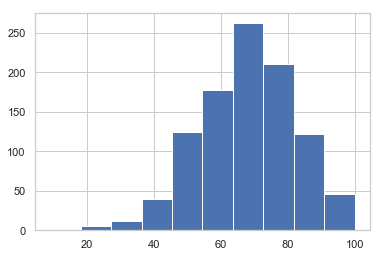

In [22]:
plt.hist(students_df.composite)
plt.show()

In [23]:
jarque_bera(students_df.composite)

(15.453387913085168, 0.00044089934264401887)

In [24]:
normaltest(students_df.composite)

NormaltestResult(statistic=15.186721327231322, pvalue=0.0005037851534494478)

The weighted average scores are close to being normally distributed, but are not exactly normally distributed.

In [25]:
students_df['bc_composite'] = students_df.composite.map(boxcox)

IndexError: tuple index out of range

## Q 3

In [26]:
students_df.corr()

,math score,reading score,writing score,new_math,new_reading,new_writing,composite
math score,1.000000,0.817580,0.802642,0.999998,0.817580,0.802642,0.918746
reading score,0.817580,1.000000,0.954598,0.817577,1.000000,0.954598,0.970331
writing score,0.802642,0.954598,1.000000,0.802619,0.954598,1.000000,0.965667
new_math,0.999998,0.817577,0.802619,1.000000,0.817577,0.802619,0.918736
new_reading,0.817580,1.000000,0.954598,0.817577,1.000000,0.954598,0.970331
new_writing,0.802642,0.954598,1.000000,0.802619,0.954598,1.000000,0.965667
composite,0.918746,0.970331,0.965667,0.918736,0.970331,0.965667,1.000000


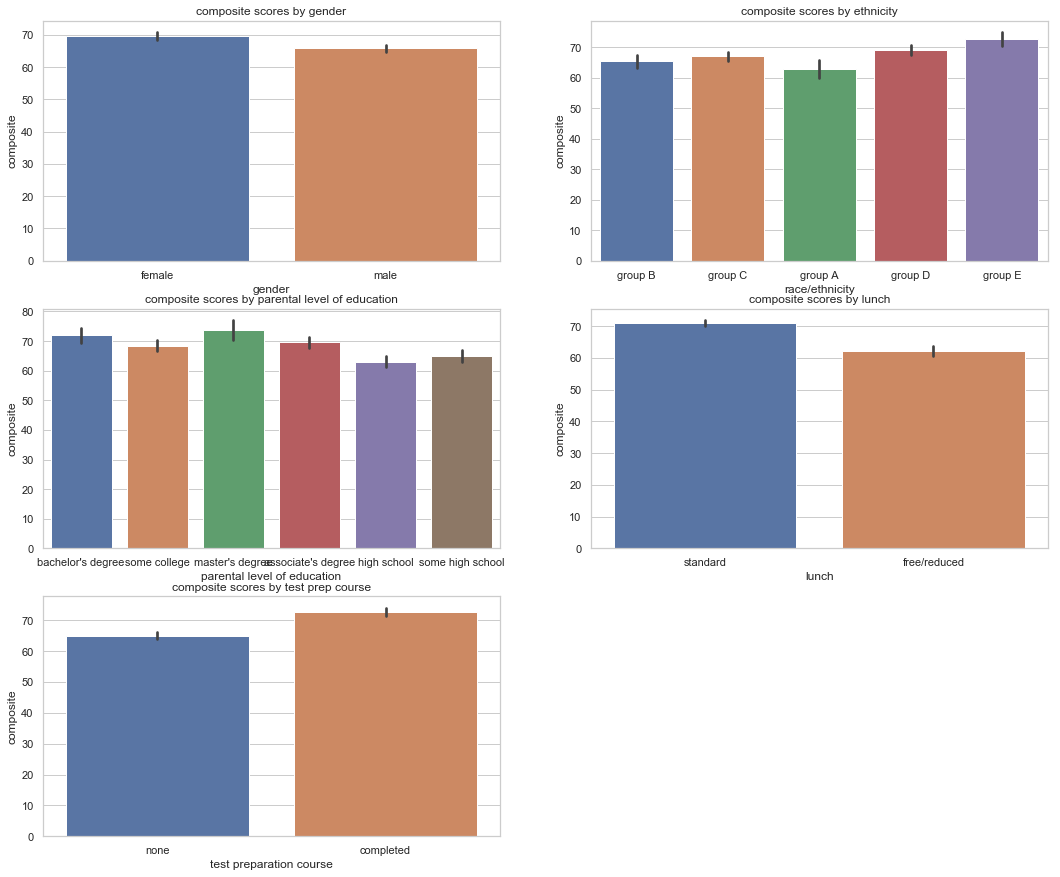

In [30]:
plt.figure(figsize=(18,15))

plt.subplot(3,2,1)
sns.barplot(students_df['gender'], students_df.composite)
plt.title("composite scores by gender")

plt.subplot(3,2,2)
sns.barplot(students_df['race/ethnicity'], students_df.composite)
plt.title("composite scores by ethnicity")

plt.subplot(3,2,3)
sns.barplot(students_df['parental level of education'], students_df.composite)
plt.title("composite scores by parental level of education")

plt.subplot(3,2,4)
sns.barplot(students_df['lunch'], students_df.composite)
plt.title("composite scores by lunch")

plt.subplot(3,2,5)
sns.barplot(students_df['test preparation course'], students_df.composite)
plt.title("composite scores by test prep course")


plt.show()

In [32]:
genderlist = students_df["gender"].unique()
grouped_df = students_df.groupby("gender")
print("------------------------------------------------")
print("Comparisons for composite scores")
print("------------------------------------------------")
for i in range(0, len(genderlist)):
    for j in range(i+1, len(genderlist)):
        print("t-test between groups {0} and {1}:".format(genderlist[i], genderlist[j]))
        print(stats.ttest_ind(
            students_df[students_df["gender"]==genderlist[i]]['composite'], 
            students_df[students_df["gender"]==genderlist[j]]['composite']
        ))

------------------------------------------------
Comparisons for composite scores
------------------------------------------------
t-test between groups female and male:
Ttest_indResult(statistic=4.169913529142, pvalue=3.311973638243664e-05)


In [33]:
genderlist = students_df["race/ethnicity"].unique()
grouped_df = students_df.groupby("race/ethnicity")
print("------------------------------------------------")
print("Comparisons for composite scores")
print("------------------------------------------------")
for i in range(0, len(genderlist)):
    for j in range(i+1, len(genderlist)):
        print("t-test between groups {0} and {1}:".format(genderlist[i], genderlist[j]))
        print(stats.ttest_ind(
            students_df[students_df["race/ethnicity"]==genderlist[i]]['composite'], 
            students_df[students_df["race/ethnicity"]==genderlist[j]]['composite']
        ))

------------------------------------------------
Comparisons for composite scores
------------------------------------------------
t-test between groups group B and group C:
Ttest_indResult(statistic=-1.2782467415831538, pvalue=0.20174731227733955)
t-test between groups group B and group A:
Ttest_indResult(statistic=1.3165043669633527, pvalue=0.1890930589509443)
t-test between groups group B and group D:
Ttest_indResult(statistic=-2.8031083992077255, pvalue=0.005279949204374891)
t-test between groups group B and group E:
Ttest_indResult(statistic=-4.46037807261396, pvalue=1.1254806793764281e-05)
t-test between groups group C and group A:
Ttest_indResult(statistic=2.4665932040951084, pvalue=0.01405260483160102)
t-test between groups group C and group D:
Ttest_indResult(statistic=-1.8063576953600955, pvalue=0.07138158673813609)
t-test between groups group C and group E:
Ttest_indResult(statistic=-3.9358689466045482, pvalue=9.580199335080225e-05)
t-test between groups group A and group D:

In [34]:
genderlist = students_df["parental level of education"].unique()
grouped_df = students_df.groupby("parental level of education")
print("------------------------------------------------")
print("Comparisons for composite scores")
print("------------------------------------------------")
for i in range(0, len(genderlist)):
    for j in range(i+1, len(genderlist)):
        print("t-test between groups {0} and {1}:".format(genderlist[i], genderlist[j]))
        print(stats.ttest_ind(
            students_df[students_df["parental level of education"]==genderlist[i]]['composite'], 
            students_df[students_df["parental level of education"]==genderlist[j]]['composite']
        ))

------------------------------------------------
Comparisons for composite scores
------------------------------------------------
t-test between groups bachelor's degree and some college:
Ttest_indResult(statistic=2.200746866670862, pvalue=0.028421853941795295)
t-test between groups bachelor's degree and master's degree:
Ttest_indResult(statistic=-0.7594769500339048, pvalue=0.4485891321202008)
t-test between groups bachelor's degree and associate's degree:
Ttest_indResult(statistic=1.5013009645983189, pvalue=0.13421131516223408)
t-test between groups bachelor's degree and high school:
Ttest_indResult(statistic=5.539323736236874, pvalue=6.457780161976827e-08)
t-test between groups bachelor's degree and some high school:
Ttest_indResult(statistic=3.941854876966818, pvalue=0.00010103335958568066)
t-test between groups some college and master's degree:
Ttest_indResult(statistic=-2.5596520690466438, pvalue=0.010997532204148747)
t-test between groups some college and associate's degree:
Tte

In [35]:
genderlist = students_df["lunch"].unique()
grouped_df = students_df.groupby("lunch")
print("------------------------------------------------")
print("Comparisons for composite scores")
print("------------------------------------------------")
for i in range(0, len(genderlist)):
    for j in range(i+1, len(genderlist)):
        print("t-test between groups {0} and {1}:".format(genderlist[i], genderlist[j]))
        print(stats.ttest_ind(
            students_df[students_df["lunch"]==genderlist[i]]['composite'], 
            students_df[students_df["lunch"]==genderlist[j]]['composite']
        ))

------------------------------------------------
Comparisons for composite scores
------------------------------------------------
t-test between groups standard and free/reduced:
Ttest_indResult(statistic=9.575113051511476, pvalue=7.736791812495384e-21)


In [36]:
genderlist = students_df["test preparation course"].unique()
grouped_df = students_df.groupby("test preparation course")
print("------------------------------------------------")
print("Comparisons for composite scores")
print("------------------------------------------------")
for i in range(0, len(genderlist)):
    for j in range(i+1, len(genderlist)):
        print("t-test between groups {0} and {1}:".format(genderlist[i], genderlist[j]))
        print(stats.ttest_ind(
            students_df[students_df["test preparation course"]==genderlist[i]]['composite'], 
            students_df[students_df["test preparation course"]==genderlist[j]]['composite']
        ))

------------------------------------------------
Comparisons for composite scores
------------------------------------------------
t-test between groups none and completed:
Ttest_indResult(statistic=-8.390944443482592, pvalue=1.633780203592351e-16)


For gender, lunch, and test prep course there are statistically significant differences between the composite scores between all groups. For the race/ethnicity and parental level of education groupings the differences in scores between groups are statistically significant for most, but not all, pairs.